<h1><center>Supervised Machine Learning (with Scikit-Learn)</center></h1>

<h2><center>Classification (with K-Nearest Neighbour (KNN) algorythm)</center></h2>

<h3>Here I'm going to build a classification model that will classify countries into five groups according to their level of Innovation, Investment and Implementation of AI. The level is defined by The Global AI Index ("Total Score" in the dataset) calculated by Tortoise Media via weighting and summarizing 7 indicators: Talent, Infrastructure, Operating Environment, Research, Development, Government Strategy, Commercial.</h3>

In [140]:
import pandas as pd
import numpy as np

In [141]:
# Import dataset
filename = "AI_index_db.csv"
df = pd.read_csv(filename, index_col=0)
df.head(5)

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
Country,,,,,,,,,,,,
United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


In [142]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

Classification group ("Cluster" in the dataset) is affected by The Global AI Index, but let's make the process more interesting and assume that we have no idea which indicator influences the classification group and let the model to define it.

In [143]:
# Create arrays for the features and the target variable
y = df["Cluster"].values
X = df[["Talent", "Infrastructure", "Operating Environment", "Research", "Development", "Government Strategy", "Commercial", "Total score"]].values

In [144]:
# Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier()

In [145]:
# Check model for Israel
X_for_prediction = np.array([[35.76, 67.58, 82.44, 32.63, 27.96, 43.91, 27.33, 39.89]])

# Predict the labels for the X_new
y_pred = knn.predict(X_for_prediction)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: ['Rising stars']


Now we can make predictions using a classifier, but how do we know if the model is making correct predictions? We can evaluate its performance!
<blockquote>In classification, accuracy is a commonly-used metric. Accuracy is the number of correct predictions divided by the total number of observations.</blockquote>
How do we measure accuracy? We could compute accuracy on the data used to fit the classifier. However, as this data was used to train the model, performance will not be indicative of how well it can generalize to unseen data, which is what we are interested in!

So, let's train the model and check how it works:

In [148]:
# Import the module
from sklearn.model_selection import train_test_split

X = df[["Talent", "Infrastructure", "Operating Environment", "Research", "Development", "Government Strategy", "Commercial", "Total score"]].values
y = df["Cluster"].values

In [149]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52, stratify=y)

In [152]:
# Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print("Score:", knn.score(X_test, y_test))

Score: 0.8461538461538461


In [153]:
# Check model for Israel
X_for_prediction = np.array([[35.76, 67.58, 82.44, 32.63, 27.96, 43.91, 27.33, 39.89]])

# Predict the labels for the X_new
y_pred = knn.predict(X_for_prediction)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: ['Waking up']


Ooops, something went wrong, let's check what number of neighbours is more appropriate:

In [193]:
# Try different numbers of neighbours
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print("Train accuracies:", train_accuracies,'\n',"Test accuracies:", test_accuracies)

Train accuracies: {1: 1.0, 2: 0.9387755102040817, 3: 0.9183673469387755, 4: 0.8979591836734694, 5: 0.8775510204081632, 6: 0.8367346938775511, 7: 0.7551020408163265, 8: 0.7346938775510204, 9: 0.7755102040816326, 10: 0.7142857142857143, 11: 0.7346938775510204, 12: 0.7346938775510204} 
 Test accuracies: {1: 0.8461538461538461, 2: 0.8461538461538461, 3: 0.9230769230769231, 4: 0.7692307692307693, 5: 0.8461538461538461, 6: 0.7692307692307693, 7: 0.6153846153846154, 8: 0.6923076923076923, 9: 0.6153846153846154, 10: 0.6153846153846154, 11: 0.6153846153846154, 12: 0.6153846153846154}


Let's visualize model complexity and select more accurate number of neighbours

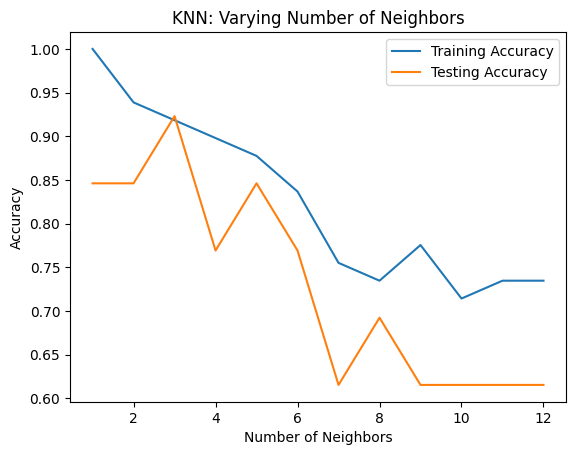

In [155]:
# Import module
from matplotlib import pyplot as plt

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

It seems like three neighbours is the better choice for the model

In [200]:
# Create a KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print("Score:", knn.score(X_test, y_test))

# Check model for Israel
X_for_prediction = np.array([[35.76, 67.58, 82.44, 32.63, 27.96, 43.91, 27.33, 39.89]])

# Predict the labels for the X_new
y_pred = knn.predict(X_for_prediction)

# Print the predictions for X_new
print("Prediction: {}".format(y_pred)) 

Score: 0.9230769230769231
Prediction: ['Rising stars']


Now the prediction looks better! However, model performance is also dependendent on the way we split up the data.

Let's apply cross-validation and check the accuracy:

<blockquote>Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.</blockquote>



In [185]:
# Import k-folder
from sklearn.model_selection import cross_val_score, KFold

# Use the same model as before
knn = KNeighborsClassifier(n_neighbors = 3)

# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Check accuracy for each of five folds 
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

# Print all 5 times scores 
print("Scores:", scores)

Scores: [0.84615385 0.84615385 0.83333333 0.91666667 0.75      ]


Let's analyze cross-validation metrics:

In [188]:
# Print the mean
print("Mean score:", np.mean(scores))

# Print the standard deviation
print("Standard Deviation:", np.std(scores))

# Print the 95% confidence interval
print("95% confidence interval:", np.quantile(scores, [0.025, 0.975]))

Mean score: 0.8384615384615384
Standard Deviation: 0.05307754242175499
95% confidence interval: [0.75833333 0.90961538]


An average score of 0.84 with a low standard deviation is pretty good for a model out of the box!

Ok, let's make sure that the best cross-validation metrics are still for three neighbours (as we defined before):

In [199]:
neighbors = np.arange(1, 13)
for neighbor in neighbors:
    # Use the same model as before
    knn = KNeighborsClassifier(n_neighbors = neighbor)

    # Create a KFold object
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Check accuracy for each of five folds 
    scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

    # Print all 5 times scores 
    print("Scores for", neighbor, "neighbour(s):", scores, np.mean(scores), np.std(scores))

Scores for 1 neighbour(s): [0.84615385 0.76923077 0.75       0.91666667 0.83333333] 0.823076923076923 0.059390947804617775
Scores for 2 neighbour(s): [0.69230769 0.61538462 0.83333333 0.83333333 0.91666667] 0.7782051282051282 0.10875543620742818
Scores for 3 neighbour(s): [0.84615385 0.84615385 0.83333333 0.91666667 0.75      ] 0.8384615384615384 0.05307754242175499
Scores for 4 neighbour(s): [0.61538462 0.61538462 0.75       0.83333333 0.91666667] 0.7461538461538462 0.11907213047180824
Scores for 5 neighbour(s): [0.76923077 0.61538462 0.83333333 0.91666667 0.66666667] 0.7602564102564102 0.10920789455921463
Scores for 6 neighbour(s): [0.76923077 0.61538462 0.83333333 0.83333333 0.58333333] 0.726923076923077 0.10723345469911018
Scores for 7 neighbour(s): [0.53846154 0.61538462 0.83333333 0.83333333 0.58333333] 0.6807692307692308 0.12694250045627245
Scores for 8 neighbour(s): [0.61538462 0.61538462 0.83333333 0.83333333 0.58333333] 0.6961538461538462 0.11261636541537308
Scores for 9 neig

Nice! Now we have a pretty good model that can define a classification group for any country not presented in the dataset (in case we know the neccessary indicators, of course).